   Welcome to New York Housing Analysis Tool
**************************************************

 1 - User Login
 2 - User Registration

Enter your option: 1
Please enter your username: Niru
Please enter your the password: ········

------------------------------Access granted------------------------------- 

**********   Welcome to our NewYork Housing Market Analysis!   **********

Choose the Analysis you would like to perform:

1) Broker listing analysis
2) Locality property_analysis
3) Show top listed properties
4) List properties based on criteria interactive
5) Exit
1
Property types available for analysis:
1. Co-op for sale
2. Condo for sale
3. Pending
4. Multi-family home for sale
5. House for sale
6. Condop for sale
7. Townhouse for sale
8. For sale
9. Contingent
10. Land for sale
--------------------------------------


Select a property type to view top brokers and price metrics (enter the number): 2
			Top 5 brokers for Condo for sale:
----------------------------------------

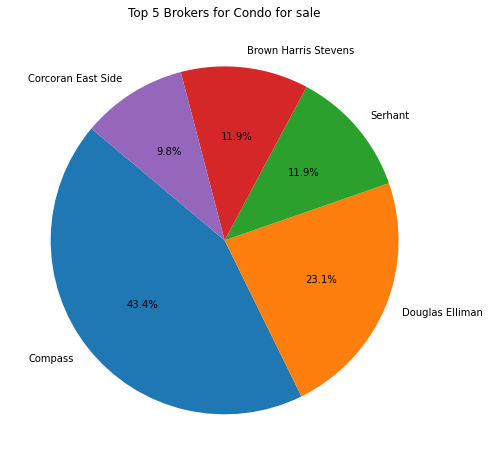


Select a broker to view highest, lowest, and average price (enter the number): 1
			Broker: Compass
-------------------------------------------------------------------------
Highest price for Condo for sale:            $28,000,000.00
Lowest price for Condo for sale:                 $60,000.00
Average price for Condo for sale:             $3,043,139.67

1) Broker listing analysis
2) Locality property analysis
3) Show top listed properties
4) List properties based on criteria interactive
5) Exit
2
Top 10 Most Listed Properties:
1. Address:   856 Washington Ave Apt 6CBrooklyn, NY 11238        Number of Listings:   3
2. Address:   301 W 53rd St Apt 19ANew York, NY 10019            Number of Listings:   2
3. Address:   773 Eastern Pkwy Apt 2ACrown Heights, NY 11213     Number of Listings:   2
4. Address:   9967 Shore Rd Apt 7EBrooklyn, NY 11209             Number of Listings:   2
5. Address:   444 78th StBrooklyn, NY 11209                      Number of Listings:   2
6. Address:   401 E 74

KeyboardInterrupt: Interrupted by user

In [3]:
"""New York Housing Market Analysis :
This project facilitates the analysis of the New York housing market, offering functionalities for user authentication, 
data extraction, and detailed market analysis. It allows stakeholders to gain insights into property listings,
broker activities, and local market trends, supporting informed decision-making in the dynamic NYC real estate landscape."""
#importing external module to the program
import getpass
import matplotlib.pyplot as plt
import pandas as pd
import re
import csv
import random
import numpy as np

#define function to prompt existing user for login
def user_login():
    """This function handles user login. It reads user credentials from a file, prompts the user for a username and password, 
    and grants access if the provided credentials match those in the file."""
    user_pwd = {}
    with open("user_credentials.txt", mode='r') as credentials_file:
        for line in credentials_file:
            user, pwd = line.strip().split(",")
            user_pwd[user] = pwd
            
    #To count the number of attempts 
    attempt = 0
    max_attempts = 3

    while attempt < max_attempts:
        
        username = input("Please enter your username: ")
        password = getpass.getpass("Please enter your the password: ")
        
        #Verifying credentials 
        if username in user_pwd and user_pwd[username] == password:
            print("\n------------------------------Access granted------------------------------- \n\n**********   Welcome to our NewYork Housing Market Analysis!   **********")
            conslidated_operations()
            return
        else:
            attempt += 1
            if attempt < max_attempts:
                print("\nSorry, incorrect credentials. Please try again.")
                print(f"Your number of attempts: {attempt}/3.")
            else:
                print("\nMaximum login attempts reached. Access denied.")
                break

#define function to prompt new user for registration
def user_registration():
    """This function handles the registration of a new user. It prompts the user for a username and a password, checks if the 
    username is available, ensures the password meets specific criteria, and then appends the new credentials to the user 
    credentials file."""
    user_pwd = {}

    # Read the existing user credentials to verify that username is new
    with open("user_credentials.txt", mode='r') as user_file:
        for line in user_file:
            if line.strip():  
                user, pwd = line.strip().split(",")
                user_pwd[user] = pwd

    #Ask for a new username and ensure it's not already taken
    new_username = input("Enter a new user name: ")
    while new_username in user_pwd:
        print("Sorry, this username is not available. Please try a different username.")
        new_username = input("Enter a new user name: ")

    #Get new password and validate it using getpass
    new_pwd = getpass.getpass("Enter the new password: ")
    while len(new_pwd) < 8 or not re.search("[a-zA-Z]", new_pwd) or not re.search("[0-9]", new_pwd) or not re.search("[!@#$%^&*(),.?\":{}|<>]", new_pwd):
        print("Password must be at least 8 characters long, include both alphabets and numbers, and contain at least one special character.")
        new_pwd = getpass.getpass("Enter the new password: ")

    with open("user_credentials.txt", mode='a') as user_file:
        #New line
        user_file.write(f"\n{new_username},{new_pwd}")

    print("\nUsername and password have been added successfully.")

#define function to read the data file
def extract_housing_data():
    """This function reads data from our CSV file and extracts relevant information, storing it in a list called 
    housing_data_list."""
    housing_data_list = []
    #file_path = 'NY housing.csv'
    
    with open('NY housing.csv', mode='r', newline='') as file:
        reader = csv.reader(file)
        for record in reader:
            #Aassigning variables to the columns
            broker_title, property_type, price, beds, bath, property_sqft, address, sublocality = record

            #Creating a tuple with the variable names
            house_info = (
                broker_title.strip(),
                property_type.strip(),
                price.strip(),
                beds.strip(),
                bath.strip(),
                property_sqft.strip(),
                address.strip(),
                sublocality.strip()
            )
            
            housing_data_list.append(house_info)    
    return housing_data_list


#1 
def broker_listing_analysis():
    """This function allows users to analyze the number of listings per broker and view the types of properties listed
    by a selected broker."""
    housing_df = pd.read_csv('NY housing.csv')

    #Display property types
    property_types = housing_df['TYPE'].unique()
    print("Property types available for analysis:")
    print(len("Property types available for analysis:")*'=')
    for i, prop_type in enumerate(property_types, 1):
        print(f"{i}. {prop_type}")
    print(len("Property types available for analysis:")*'-')

    #Select property type
    prop_type_choice = int(input("\n\nSelect a property type to view top brokers and price metrics (enter the number): "))
    print(len("Select a property type to view top brokers and average price (enter the number):")*'=')
    selected_prop_type = property_types[prop_type_choice - 1]
    prop_type_df = housing_df[housing_df['TYPE'] == selected_prop_type]

    #Display top 5 brokers for the selected property type
    top_brokers = prop_type_df['BROKERTITLE'].value_counts().nlargest(5)
    print(f"\t\t\tTop 5 brokers for {selected_prop_type}:")
    print(len("Top 5 brokers for {selected_prop_type}:") *'--')
    for i, (broker, count) in enumerate(top_brokers.items(), 1):
        print(f"{i}. {broker:<35} ({count} properties)")
    print(len("Top 5 brokers for {selected_prop_type}:") *'--')   
    
    #Creating pie chart showing the distribution of properties among different brokers
    broker_counts = prop_type_df['BROKERTITLE'].value_counts().nlargest(5)
    plt.figure(figsize=(8, 8))
    plt.pie(broker_counts, labels=broker_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Top 5 Brokers for {selected_prop_type}")
    print('\n\n')
    plt.show()

    #Ask the user to select a broker
    broker_choice = int(input("\nSelect a broker to view highest, lowest, and average price (enter the number): "))
    print('=' * len(f'Select a broker to view highest, lowest, and average price (enter the number):'))
    selected_broker = top_brokers.index[broker_choice - 1]
    broker_prop_df = prop_type_df[prop_type_df['BROKERTITLE'] == selected_broker]

    # Calculate and display highest, lowest, and average price for the selected broker and property type
    highest_price = broker_prop_df['PRICE'].max()
    lowest_price = broker_prop_df['PRICE'].min()
    avg_price = broker_prop_df['PRICE'].mean()
    print(f"\t\t\tBroker: {selected_broker}")
    print('-------------------------------------------------------------------------')
    print(f"Highest price for {selected_prop_type}: {'$' + f'{highest_price:,.2f}':>25}")
    print(f"Lowest price for {selected_prop_type}:  {'$' + f'{lowest_price:,.2f}':>25}")
    print(f"Average price for {selected_prop_type}: {'$' + f'{avg_price:,.2f}':>25}")

# 2
def locality_property_analysis():
    """This function allows users to analyze the number of listings per broker and view the types of properties listed by a 
    selected broker."""
    housing_df = pd.read_csv('NY housing.csv')

    #Display top 10 localities based on the count of different addresses
    top_localities = housing_df['SUBLOCALITY'].value_counts().nlargest(10)
    print("Top 10 Localities based on Number of Different Addresses:")
    print(len(" Top 10 Localities based on Number of  Different Addresses :   ") * '=')
    for i, (locality, count) in enumerate(top_localities.items(), 1):
        print(f"{i}. {locality:<40}{count:>10} addresses")
    print('----------------------------------------------------------------')   
    
    #Plot horizontal bar graph for visualizing
    plt.figure(figsize=(10, 6))
    top_localities.plot(kind='barh', color='skyblue')
    plt.xlabel('Number of Addresses')
    plt.ylabel('Locality')
    plt.title('Top 10 Localities based on Number of Different Addresses')
    print()
    plt.gca().invert_yaxis() 
    plt.show()
    
    #Ask the user to select a locality
    locality_choice = int(input("\nSelect a locality (enter the number): "))
    print(len('Select a locality (enter the number):') * '=')
    selected_locality = top_localities.index[locality_choice - 1]
    locality_df = housing_df[housing_df['SUBLOCALITY'] == selected_locality]

    #Display average price distribution for the top 3 property types within the selected locality
    top_property_types = locality_df['TYPE'].value_counts().nlargest(3)
    print(f"Top 3 Property Types in {selected_locality}:")
    print(len('Top 3 Property Types in {selected_locality}:') * '-')
    for i, (prop_type, count) in enumerate(top_property_types.items(), 1):
        print(f"{i}. {prop_type:<30} {count} listings")
    print(len('Top 3 Property Types in {selected_locality}:') * '-')
    prop_type_choice = int(input("\nSelect a property type to view its average square foot and average price (enter the number): "))
    print(len('   Select a property type to view average square foot and average price (enter the number):') * '=')
    selected_property_type = top_property_types.index[prop_type_choice - 1]

    #Filter and display metrics for the selected property type
    prop_type_df = locality_df[locality_df['TYPE'] == selected_property_type]
    avg_sqft = prop_type_df['PROPERTYSQFT'].mean()
    avg_price = prop_type_df['PRICE'].mean()
    print(f"{'Selected Locality:':<65}{selected_locality:<25}")
    print(f"{'Selected Property Type:':<65}{selected_property_type:<25}")
    print(f"{'Average square footage for ' + selected_property_type + ' in ' + selected_locality + ':':<65}{avg_sqft:.2f} sqft")
    print(f"{'Average price for ' + selected_property_type + ' in ' + selected_locality + ':':<65}${avg_price:,.2f}")
#3

def show_top_listed_properties(top_n=10):
    
    """The function shows the top 10 most listed properties along with their counts and display the amenities according to user 
    choice. Furthermore, displays similar property upon user prompt """
    housing_df = pd.read_csv('NY Housing.csv')
    property_counts = housing_df['MAIN_ADDRESS'].value_counts().nlargest(top_n)

    #Display top 10 most listed properties along with counts
    print("Top {} Most Listed Properties:".format(top_n))
    print(len('"Top {} Most Listed Properties:".format(top_n)------------------------------------------') * '=')
    for i, (address, count) in enumerate(property_counts.items(), 1):
        print(f"{i}. Address:   {address:<50} Number of Listings: {str(count):>3}")
    print(len('"Top {} Most Listed Properties:".format(top_n)------------------------------------------') * '=')

    #Ask the user to select a property to view amenities
    selected_property = int(input("\n\nSelect a property to view amenities (enter the number): "))
    print(len('\n\nSelect a property to view amenities (enter the number):   ') * '=')
    selected_address = property_counts.index[selected_property - 1]
    selected_property_info = housing_df[housing_df['MAIN_ADDRESS'] == selected_address].iloc[0]

    # Display amenities for the selected property
    print("Amenities for selected property:")
    print(len('Amenities for selected property:--------------------------') * '-')
    print(f"Address:              {selected_property_info['MAIN_ADDRESS']} ")
    print(f"Property Type:        {selected_property_info['TYPE']}")
    print(f"Beds:                 {selected_property_info['BEDS']}")
    print(f"Baths:                {selected_property_info['BATH']}")
    print(f"SqFoot Price:         ${selected_property_info['PRICE'] / selected_property_info['PROPERTYSQFT']:.2f}")
    print(f"Locality:             {selected_property_info['SUBLOCALITY']}")
    print(len('Amenities for selected property:--------------------------') * '-')

    #Ask the user if they want to find a random property with similar amenities
    search_random = input("\n\nDo you want to find another property with similar amenities? (yes/no): ")
    print(len("\nDo you want to find another property with similar amenities? (yes/no): ")*'=')
    if search_random.lower() == 'yes':
        # Filter dataframe for properties with the same property type
        similar_properties = housing_df[housing_df['TYPE'] == selected_property_info['TYPE']]
        # Filter further for properties with similar beds, baths, and locality
        similar_properties = similar_properties[(similar_properties['BEDS'] == selected_property_info['BEDS']) &
                                                (similar_properties['BATH'] == selected_property_info['BATH']) &
                                                (similar_properties['SUBLOCALITY'] == selected_property_info['SUBLOCALITY'])]
        similar_properties = similar_properties[similar_properties.index != selected_property_info.name]

        if len(similar_properties) > 0:
            # Select a random property excluding the previously displayed one
            random_property = similar_properties.sample()
            print("Other property with similar amenities:")
            print(len("\nAnother property with similar amenities:                          ") *'-')
            print(f"Address:                {random_property['MAIN_ADDRESS'].iloc[0]}")
            print(f"Property Type:          {random_property['TYPE'].iloc[0]}")
            print(f"Beds:                   {random_property['BEDS'].iloc[0]}")
            print(f"Baths:                  {random_property['BATH'].iloc[0]}")
            print(f"SqFoot Price:           ${random_property['PRICE'].iloc[0] / random_property['PROPERTYSQFT'].iloc[0]:.2f}")
            print(f"Locality:               {random_property['SUBLOCALITY'].iloc[0]}")
            print(len("\nOther property with similar amenities:                          " ) *'-')
        else:
            print("\nNo similar properties found.")


def list_properties_based_on_criteria_interactive():
    """The function asks user to select a criteria and display total count, and show a bar chart for price distribution of the 
    top 10 properties of the selection by the user."""
    housing_df = pd.read_csv('NY Housing.csv')

    while True:
        #Ask user preference
        filter_choice = input("\n\nFilter by number of beds or square footage? Enter 'beds' or 'sqft' (type 'done' to exit): ").lower()
        if filter_choice == 'done':
            break

        if filter_choice not in ['beds', 'sqft']:
            print("Invalid choice. Please enter 'beds', 'sqft', or 'done' to exit.")
            continue

        if filter_choice == 'beds':
            #Show the range for the number of beds and get next input
            min_beds = housing_df['BEDS'].min()
            max_beds = housing_df['BEDS'].max()
            print(f"\n\nEnter the number of beds (range: {min_beds} to {max_beds}): ")
            num_beds = input()
            if num_beds.lower() == 'done':
                break
            num_beds = int(num_beds)
            filtered_properties = housing_df[housing_df['BEDS'] == num_beds]
            
        elif filter_choice == 'sqft':
            #Show the range for square footage and get user input
            min_sqft = housing_df['PROPERTYSQFT'].min()
            max_sqft = housing_df['PROPERTYSQFT'].max()
            print(f"\n\nEnter the square footage (range: {min_sqft} to {max_sqft}): ")
            sqft = input()
            if sqft.lower() == 'done':
                break
            sqft = float(sqft)
            filtered_properties = housing_df[housing_df['PROPERTYSQFT'] >= sqft]

        if not filtered_properties.empty:
            #Display the total number of properties found
            total_properties = len(filtered_properties)
            print(f"\n\nThe total number of properties with that feature is: {total_properties}")
            top_properties = filtered_properties.sort_values(by='PRICE', ascending=False).head(10)

            #Plotting the price distribution of the top 10 properties
            fig, ax = plt.subplots(figsize=(10, 8))
            ax.bar(top_properties['MAIN_ADDRESS'], top_properties['PRICE'])
            ax.set_xticks(np.arange(len(top_properties)))
            ax.set_xticklabels(top_properties['MAIN_ADDRESS'], rotation=90)
            ax.set_ylabel('Price')
            ax.set_title('Top 10 Properties by Price')
            max_price = top_properties['PRICE'].max()
            yticks = np.linspace(0, max_price, num=5)  # Create 5 evenly spaced y-ticks
            ax.set_yticks(yticks)
            ax.set_yticklabels(['{:,.0f}'.format(y) for y in yticks])

            plt.tight_layout()
            plt.show()

            #Display amenities of the most and least expensive properties
            most_expensive = filtered_properties.loc[filtered_properties['PRICE'].idxmax()]
            least_expensive = filtered_properties.loc[filtered_properties['PRICE'].idxmin()]
            print("\n\nMost expensive property:")
            print(len("\nMost expensive property:                            ")*'=')
            display_property_details(most_expensive)
            print("\n\nLeast expensive property:")
            print(len("\nMost expensive property:                             ")*'=')
            display_property_details(least_expensive)
        else:
            print("No properties found matching the criteria.")

def display_property_details(property_row):
    """Display details of a property."""
    print(f"Address:          {property_row['MAIN_ADDRESS']}")
    print(f"Beds:             {property_row['BEDS']}")
    print(f"Baths:            {property_row['BATH']}")
    print(f"Property Type:    {property_row['TYPE']}")
    print(f"SqFoot Price:     ${property_row['PRICE'] / property_row['PROPERTYSQFT']:.2f}")
    print(f"Locality:         {property_row['SUBLOCALITY']}")
    print(len("\nMost expensive property:                            ")*'=')


def conslidated_operations():
    """
    This function gives user the options from which the program displays the analysis.
    """
    
    extract_housing_data()
    
    #Displaying the menu for the different types of analysis the user can perform.
    print("\nChoose the Analysis you would like to perform:\n")
    
    #Asking user's choice.
    user_choice = int(input("1) Broker listing analysis\n2) Locality property_analysis\n3) Show top listed properties\n4) List properties based on criteria interactive\n5) Exit\n"))

    #Loop to keep the program running until the user chooses to exit.
    while user_choice != 5:
        if user_choice == 1:
            broker_listing_analysis()
        elif user_choice == 2:
             show_top_listed_properties()                        
        elif user_choice == 3:
            locality_property_analysis()
        elif user_choice == 4:
            list_properties_based_on_criteria_interactive()

        #Re-displaying the menu and asking the user's next choice.
        print()
        user_choice = int(input("1) Broker listing analysis\n2) Locality property analysis\n3) Show top listed properties\n4) List properties based on criteria interactive\n5) Exit\n"))

def main():
    """
    This is the main entry point of the program. 
    It welcomes the user and provides them with the option to either log in or register.
    Based on the user's input, it directs them to the corresponding functionality.
    """

    print("   Welcome to New York Housing Analysis Tool")
    print("*" * 50)
    print("\n 1 - User Login\n 2 - User Registration\n")

    #Ask for the user to choose between login and registration.
    choice = int(input("Enter your option: "))
    
    #Directing the user to either login or registration flow based on their input.
    if choice == 1:
        user_login()  
    elif choice == 2:
        user_registration() 


main()

In [11]:
"""New York Housing Market Analysis :
This project facilitates the analysis of the New York housing market, offering functionalities for user authentication, 
data extraction, and detailed market analysis. It allows stakeholders to gain insights into property listings,
broker activities, and local market trends, supporting informed decision-making in the dynamic NYC real estate landscape."""
#importing external module to the program
import getpass
import matplotlib.pyplot as plt
import pandas as pd
import re
import csv
import random
import numpy as np

#define function to prompt existing user for login
def user_login():
    """This function handles user login. It reads user credentials from a file, prompts the user for a username and password, 
    and grants access if the provided credentials match those in the file."""
    user_pwd = {}
    with open("user_credentials.txt", mode='r') as credentials_file:
        for line in credentials_file:
            user, pwd = line.strip().split(",")
            user_pwd[user] = pwd
            
    #To count the number of attempts 
    attempt = 0
    max_attempts = 3

    while attempt < max_attempts:
        
        username = input("Please enter your username: ")
        password = getpass.getpass("Please enter your the password: ")
        
        #Verifying credentials 
        if username in user_pwd and user_pwd[username] == password:
            print("\n------------------------------Access granted------------------------------- \n\n**********   Welcome to our NewYork Housing Market Analysis!   **********")
            conslidated_operations()
            return
        else:
            attempt += 1
            if attempt < max_attempts:
                print("\nSorry, incorrect credentials. Please try again.")
                print(f"Your number of attempts: {attempt}/3.")
            else:
                print("\nMaximum login attempts reached. Access denied.")
                break

#define function to prompt new user for registration
def user_registration():
    """This function handles the registration of a new user. It prompts the user for a username and a password, checks if the 
    username is available, ensures the password meets specific criteria, and then appends the new credentials to the user 
    credentials file."""
    user_pwd = {}

    # Read the existing user credentials to verify that username is new
    with open("user_credentials.txt", mode='r') as user_file:
        for line in user_file:
            if line.strip():  
                user, pwd = line.strip().split(",")
                user_pwd[user] = pwd

    #Ask for a new username and ensure it's not already taken
    new_username = input("Enter a new user name: ")
    while new_username in user_pwd:
        print("Sorry, this username is not available. Please try a different username.")
        new_username = input("Enter a new user name: ")

    #Get new password and validate it using getpass
    new_pwd = getpass.getpass("Enter the new password: ")
    while len(new_pwd) < 8 or not re.search("[a-zA-Z]", new_pwd) or not re.search("[0-9]", new_pwd) or not re.search("[!@#$%^&*(),.?\":{}|<>]", new_pwd):
        print("Password must be at least 8 characters long, include both alphabets and numbers, and contain at least one special character.")
        new_pwd = getpass.getpass("Enter the new password: ")

    with open("user_credentials.txt", mode='a') as user_file:
        #New line
        user_file.write(f"\n{new_username},{new_pwd}")

    print("\nUsername and password have been added successfully.")

#define function to read the data file
def extract_housing_data():
    """This function reads data from our CSV file and extracts relevant information, storing it in a list called 
    housing_data_list."""
    housing_data_list = []
    #file_path = 'NY housing.csv'
    
    with open('NY housing.csv', mode='r', newline='') as file:
        reader = csv.reader(file)
        for record in reader:
            #Aassigning variables to the columns
            broker_title, property_type, price, beds, bath, property_sqft, address, sublocality = record

            #Creating a tuple with the variable names
            house_info = (
                broker_title.strip(),
                property_type.strip(),
                price.strip(),
                beds.strip(),
                bath.strip(),
                property_sqft.strip(),
                address.strip(),
                sublocality.strip()
            )
            
            housing_data_list.append(house_info)    
    return housing_data_list


#1 
def broker_listing_analysis():
    """This function allows users to analyze the number of listings per broker and view the types of properties listed
    by a selected broker."""
    housing_df = pd.read_csv('NY housing.csv')

    #Display property types
    property_types = housing_df['TYPE'].unique()
    print("Property types available for analysis:")
    print(len("Property types available for analysis:")*'=')
    for i, prop_type in enumerate(property_types, 1):
        print(f"{i}. {prop_type}")
    print(len("Property types available for analysis:")*'-')

    #Select property type
    while True:
        try:
            prop_type_choice = int(input("\nSelect a property type to view top brokers and price metrics (enter the number): "))
            selected_prop_type = property_types[prop_type_choice - 1]
            prop_type_df = housing_df[housing_df['TYPE'] == selected_prop_type]
            break  # Exit the loop if input is valid
        except (ValueError, IndexError):
            print("Please select a valid number corresponding to the property type options.")

    #Display top 5 brokers for the selected property type
    top_brokers = prop_type_df['BROKERTITLE'].value_counts().nlargest(5)
    print(f"\t\t\tTop 5 brokers for {selected_prop_type}:")
    print(len("Top 5 brokers for {selected_prop_type}:") *'--')
    for i, (broker, count) in enumerate(top_brokers.items(), 1):
        print(f"{i}. {broker:<35} ({count} properties)")
    print(len("Top 5 brokers for {selected_prop_type}:") *'--')   
    
    #Creating pie chart showing the distribution of properties among different brokers
    broker_counts = prop_type_df['BROKERTITLE'].value_counts().nlargest(5)
    plt.figure(figsize=(8, 8))
    plt.pie(broker_counts, labels=broker_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Top 5 Brokers for {selected_prop_type}")
    print('\n\n')
    plt.show()

    #Ask the user to select a broker
    while True:
        try:
            broker_choice = int(input("\nSelect a broker to view highest, lowest, and average price (enter the number): "))
            selected_broker = top_brokers.index[broker_choice - 1]
            broker_prop_df = prop_type_df[prop_type_df['BROKERTITLE'] == selected_broker]
            break  # Exit the loop if input is valid
        except (ValueError, IndexError):
            print("Please select a valid number corresponding to the broker options.")

    # Calculate and display highest, lowest, and average price for the selected broker and property type
    highest_price = broker_prop_df['PRICE'].max()
    lowest_price = broker_prop_df['PRICE'].min()
    avg_price = broker_prop_df['PRICE'].mean()
    print(f"\t\t\tBroker: {selected_broker}")
    print('-------------------------------------------------------------------------')
    print(f"Highest price for {selected_prop_type}: {'$' + f'{highest_price:,.2f}':>25}")
    print(f"Lowest price for {selected_prop_type}:  {'$' + f'{lowest_price:,.2f}':>25}")
    print(f"Average price for {selected_prop_type}: {'$' + f'{avg_price:,.2f}':>25}")

# 2
def locality_property_analysis():
    """This function allows users to analyze the number of listings per broker and view the types of properties listed by a 
    selected broker."""
    housing_df = pd.read_csv('NY housing.csv')

    #Display top 10 localities based on the count of different addresses
    top_localities = housing_df['SUBLOCALITY'].value_counts().nlargest(10)
    print("Top 10 Localities based on Number of Different Addresses:")
    print(len(" Top 10 Localities based on Number of  Different Addresses :   ") * '=')
    for i, (locality, count) in enumerate(top_localities.items(), 1):
        print(f"{i}. {locality:<40}{count:>10} addresses")
    print('----------------------------------------------------------------')   
    
    #Plot horizontal bar graph for visualizing
    plt.figure(figsize=(10, 6))
    top_localities.plot(kind='barh', color='skyblue')
    plt.xlabel('Number of Addresses')
    plt.ylabel('Locality')
    plt.title('Top 10 Localities based on Number of Different Addresses')
    print()
    plt.gca().invert_yaxis() 
    plt.show()
    
    #Ask the user to select a locality
    while True:
        try:
            locality_choice = int(input("\nSelect a locality (enter the number): "))
            selected_locality = top_localities.index[locality_choice - 1]
            locality_df = housing_df[housing_df['SUBLOCALITY'] == selected_locality]
            break  # Exit the loop if input is valid
        except (ValueError, IndexError):
            print("Please select a valid number corresponding to the locality options.")

    #Display average price distribution for the top 3 property types within the selected locality
    top_property_types = locality_df['TYPE'].value_counts().nlargest(3)
    print(f"Top 3 Property Types in {selected_locality}:")
    print(len('Top 3 Property Types in {selected_locality}:') * '-')
    for i, (prop_type, count) in enumerate(top_property_types.items(), 1):
        print(f"{i}. {prop_type:<30} {count} listings")
    print(len('Top 3 Property Types in {selected_locality}:') * '-')
    while True:
        try:
            prop_type_choice = int(input("\nSelect a property type to view its average square foot and average price (enter the number): "))
            selected_property_type = top_property_types.index[prop_type_choice - 1]
            break  # Exit the loop if input is valid
        except (ValueError, IndexError):
            print("Please select a valid number corresponding to the property type options.")

    #Filter and display metrics for the selected property type
    prop_type_df = locality_df[locality_df['TYPE'] == selected_property_type]
    avg_sqft = prop_type_df['PROPERTYSQFT'].mean()
    avg_price = prop_type_df['PRICE'].mean()
    print(f"{'Selected Locality:':<65}{selected_locality:<25}")
    print(f"{'Selected Property Type:':<65}{selected_property_type:<25}")
    print(f"{'Average square footage for ' + selected_property_type + ' in ' + selected_locality + ':':<65}{avg_sqft:.2f} sqft")
    print(f"{'Average price for ' + selected_property_type + ' in ' + selected_locality + ':':<65}${avg_price:,.2f}")
#3

def show_top_listed_properties(top_n=10):
    
    """The function shows the top 10 most listed properties along with their counts and display the amenities according to user 
    choice. Furthermore, displays similar property upon user prompt """
    housing_df = pd.read_csv('NY Housing.csv')
    property_counts = housing_df['MAIN_ADDRESS'].value_counts().nlargest(top_n)

    #Display top 10 most listed properties along with counts
    print("Top {} Most Listed Properties:".format(top_n))
    print(len('"Top {} Most Listed Properties:".format(top_n)---------------------------------------------------------------') * '=')
    for i, (address, count) in enumerate(property_counts.items(), 1):
        print(f"{i}. Address:   {address:<70} Number of Listings: {str(count):>3}")
    print(len('"Top {} Most Listed Properties:".format(top_n)---------------------------------------------------------------') * '=')

    #Ask the user to select a property to view amenities
    while True:
        try:
            selected_property = int(input("\nSelect a property to view amenities (enter the number): "))
            print('=' * len("\nSelect a property to view amenities (enter the number):"))
            if 1 <= selected_property <= top_n:
                selected_address = property_counts.index[selected_property - 1]
                selected_property_info = housing_df[housing_df['MAIN_ADDRESS'] == selected_address].iloc[0]
                break  # Exit the loop if input is valid
            else:
                print(f"Please select a number from the options.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")
            
    # Display amenities for the selected property
    print("Amenities for selected property:")
    print(len('Amenities for selected property:--------------------------') * '-')
    print(f"Address:              {selected_property_info['MAIN_ADDRESS']} ")
    print(f"Property Type:        {selected_property_info['TYPE']}")
    print(f"Beds:                 {selected_property_info['BEDS']}")
    print(f"Baths:                {selected_property_info['BATH']}")
    print(f"SqFoot Price:         ${selected_property_info['PRICE'] / selected_property_info['PROPERTYSQFT']:.2f}")
    print(f"Locality:             {selected_property_info['SUBLOCALITY']}")
    print(len('Amenities for selected property:--------------------------') * '-')

    #Ask the user if they want to find a random property with similar amenities
    search_random = input("\n\nDo you want to find another property with similar amenities? (yes/no): ")
    print(len("\nDo you want to find another property with similar amenities? (yes/no): ")*'=')
    if search_random.lower() == 'yes':
        # Filter dataframe for properties with the same property type
        similar_properties = housing_df[housing_df['TYPE'] == selected_property_info['TYPE']]
        # Filter further for properties with similar beds, baths, and locality
        similar_properties = similar_properties[(similar_properties['BEDS'] == selected_property_info['BEDS']) &
                                                (similar_properties['BATH'] == selected_property_info['BATH']) &
                                                (similar_properties['SUBLOCALITY'] == selected_property_info['SUBLOCALITY'])]
        similar_properties = similar_properties[similar_properties.index != selected_property_info.name]

        if len(similar_properties) > 0:
            # Select a random property excluding the previously displayed one
            random_property = similar_properties.sample()
            print("Other property with similar amenities:")
            print(len("\nAnother property with similar amenities:                          ") *'-')
            print(f"Address:                {random_property['MAIN_ADDRESS'].iloc[0]}")
            print(f"Property Type:          {random_property['TYPE'].iloc[0]}")
            print(f"Beds:                   {random_property['BEDS'].iloc[0]}")
            print(f"Baths:                  {random_property['BATH'].iloc[0]}")
            print(f"SqFoot Price:           ${random_property['PRICE'].iloc[0] / random_property['PROPERTYSQFT'].iloc[0]:.2f}")
            print(f"Locality:               {random_property['SUBLOCALITY'].iloc[0]}")
            print(len("\nOther property with similar amenities:                          " ) *'-')
        else:
            print("\nNo similar properties found.")

#4
def list_properties_based_on_criteria_interactive():
    """The function asks user to select a criteria and display total count, and show a bar chart for price distribution of the 
    top 10 properties of the selection by the user."""
    housing_df = pd.read_csv('NY Housing.csv')

    while True:
        #Ask user preference
        filter_choice = input("\n\nFilter by number of beds or square footage? Enter 'beds' or 'sqft' (type 'done' to exit): ").lower()
        if filter_choice == 'done':
            break

        if filter_choice not in ['beds', 'sqft']:
            print("Invalid choice. Please enter 'beds', 'sqft', or 'done' to exit.")
            continue

        if filter_choice == 'beds':
            #Show the range for the number of beds and get next input
            min_beds = housing_df['BEDS'].min()
            max_beds = housing_df['BEDS'].max()
            print(f"\n\nEnter the number of beds (range: {min_beds} to {max_beds}): ")
            num_beds = input()
            if num_beds.lower() == 'done':
                break
            num_beds = int(num_beds)
            filtered_properties = housing_df[housing_df['BEDS'] == num_beds]
            
        elif filter_choice == 'sqft':
            #Show the range for square footage and get user input
            min_sqft = housing_df['PROPERTYSQFT'].min()
            max_sqft = housing_df['PROPERTYSQFT'].max()
            print(f"\n\nEnter the square footage (range: {min_sqft} to {max_sqft}): ")
            sqft = input()
            if sqft.lower() == 'done':
                break
            sqft = float(sqft)
            filtered_properties = housing_df[housing_df['PROPERTYSQFT'] >= sqft]

        if not filtered_properties.empty:
            #Display the total number of properties found
            total_properties = len(filtered_properties)
            print(f"\n\nThe total number of properties with that feature is: {total_properties}")
            top_properties = filtered_properties.sort_values(by='PRICE', ascending=False).head(10)

            #Plotting the price distribution of the top 10 properties
            fig, ax = plt.subplots(figsize=(10, 8))
            ax.bar(top_properties['MAIN_ADDRESS'], top_properties['PRICE'])
            ax.set_xticks(np.arange(len(top_properties)))
            ax.set_xticklabels(top_properties['MAIN_ADDRESS'], rotation=90)
            ax.set_ylabel('Price')
            ax.set_title('Top 10 Properties by Price')
            max_price = top_properties['PRICE'].max()
            yticks = np.linspace(0, max_price, num=5)  # Create 5 evenly spaced y-ticks
            ax.set_yticks(yticks)
            ax.set_yticklabels(['{:,.0f}'.format(y) for y in yticks])

            plt.tight_layout()
            plt.show()

            #Display amenities of the most and least expensive properties
            most_expensive = filtered_properties.loc[filtered_properties['PRICE'].idxmax()]
            least_expensive = filtered_properties.loc[filtered_properties['PRICE'].idxmin()]
            print("\n\nMost expensive property:")
            print(len("\nMost expensive property:                            ")*'=')
            display_property_details(most_expensive)
            print("\n\nLeast expensive property:")
            print(len("\nMost expensive property:                             ")*'=')
            display_property_details(least_expensive)
        else:
            print("No properties found matching the criteria.")

def display_property_details(property_row):
    """Display details of a property."""
    print(f"Address:          {property_row['MAIN_ADDRESS']}")
    print(f"Beds:             {property_row['BEDS']}")
    print(f"Baths:            {property_row['BATH']}")
    print(f"Property Type:    {property_row['TYPE']}")
    print(f"SqFoot Price:     ${property_row['PRICE'] / property_row['PROPERTYSQFT']:.2f}")
    print(f"Locality:         {property_row['SUBLOCALITY']}")
    print(len("\nMost expensive property:                            ")*'=')


def conslidated_operations():
    """Function for user to perform different types of analysis."""
    while True:
        print("\nChoose the Analysis you would like to perform:")
        print("1) Broker listing analysis")
        print("2) Locality property analysis")
        print("3) Show top listed properties")
        print("4) List properties based on criteria interactive")
        print("5) Exit")

        try:
            user_choice = int(input("Enter your choice: "))

            if user_choice == 1:
                broker_listing_analysis()
            elif user_choice == 2:
                locality_property_analysis()
            elif user_choice == 3:
                show_top_listed_properties()
            elif user_choice == 4:
                list_properties_based_on_criteria_interactive()
            elif user_choice == 5:
                print("Thanks for using our tool. Goodbye!")
                break
            else:
                print("Please select a value within the given options.")
        except ValueError:
            print("Invalid input. Please enter a number corresponding to the options.")
def main():
    """
    This is the main entry point of the program. 
    It welcomes the user and provides them with the option to either log in or register.
    Based on the user's input, it directs them to the corresponding functionality.
    """

    print("   Welcome to New York Housing Analysis Tool")
    print("*" * 50)
    print("\n 1 - User Login\n 2 - User Registration\n")

    # Loop until a valid option (1 or 2) is entered
    while True:
        try:
            # Ask for the user to choose between login and registration.
            choice = int(input("Enter your option: "))

            # Check if the choice is within the valid options
            if choice == 1:
                user_login()
                break  # Exit the loop after successful login
            elif choice == 2:
                user_registration()
                break  # Exit the loop after successful registration
            else:
                # If choice is neither 1 nor 2, display error message
                print("Please select a value within the given options (1 or 2).")

        except ValueError:
            # Handle non-integer input with ValueError
            print("Invalid input. Please enter a number (1 or 2) corresponding to the options.")

# Call the main function to start the program
main()


   Welcome to New York Housing Analysis Tool
**************************************************

 1 - User Login
 2 - User Registration

Enter your option: 1
Please enter your username: Pradyu
Please enter your the password: ········

------------------------------Access granted------------------------------- 

**********   Welcome to our NewYork Housing Market Analysis!   **********

Choose the Analysis you would like to perform:
1) Broker listing analysis
2) Locality property analysis
3) Show top listed properties
4) List properties based on criteria interactive
5) Exit
Enter your choice: 3
Top 10 Most Listed Properties:
1. Address:   856 Washington Ave Apt 6CBrooklyn, NY 11238                            Number of Listings:   3
2. Address:   57 Reade St Apt 12ENew York, NY 10007                                  Number of Listings:   2
3. Address:   61-20 Grand Central Pkwy Unit B1210Forest Hills, NY 11375              Number of Listings:   2
4. Address:   4701 Beverley RdBrooklyn, NY

KeyboardInterrupt: Interrupted by user